In [1]:
# Numersische Approximation im Anwendungsfall: Coulomb'sches Gesetz
#
# GFS in Physik von Lucas Birkert

# Copyright (C) 2024  Lucas Birkert
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.

import numpy as np

# for illustrative purposes
def mag(vec):
    return np.sqrt(vec.dot(vec))

# Numerische Approximation im Anwendungsfall: Coulomb'sches Gesetz
## Kann ich Herr Wein's Anforderungen standhalten?

GFS in Physik von Lucas Birkert

<!-- TODO: add this to <head>
    <script>
        MathJax.Hub.Config({
            jax: ["input/TeX","output/HTML-CSS"],
            displayAlign: "left"
        });
    </script>
-->

# Gliederung
1. Einführung in der Problemstellung
2. theoretische Grundlagen
    1. Coulomb'sches Gesetz
    2. Superpositionsprinzip
    3. Prinzip der Vektorisierung
    4. Berechnung der Größen
    5. Iterationsverfahren
3. Vorstellung der Simulation
4. Ausblick
    1. Differenzialgleichungen
    2. Numerische Approximationsmethoden
5. Fazit & Quellen

# 1. Einführung in der Problemstellung

TODO

> Simulationsbereich (ca. 30x30 cm) in einem interaktiven Fenster (mit Slidern, Buttons, ...):
2-dimensionales kartesischen Koordinatensystem mit zwei ortsfeste felderzeugenden Punktladungen $Q_1$ und
$Q_2$, die symmetrisch zum Koordinatenursprung auf der 𝑥-Achse angeordnet sind, und einer beweglichen
Probepunktladung $q$ mit der Masse $m$ an einem beliebigen Ort $\vec{s}$ (= Startpunkt) in der 𝑥𝑦-Ebene. Der Einfluss
der Gravitation kann vernachlässigt werden.

> "zwei ortsfeste felderzeugende Punktladungen $Q_1$ und $Q_2$ sowie eine bewegliche Probepunktladung $q$ mit
der Masse $m$ im elektrischen Feld von $Q_1$ und $Q_2$"

# 2. theoretische Grundlagen

> Gehört dazu, sry

## 2.A. Coulomb'sches Gesetz

Annahme: Die Elektronen verteilen sich gleichmäßig auf der Kondensatorplattenoberfläche.

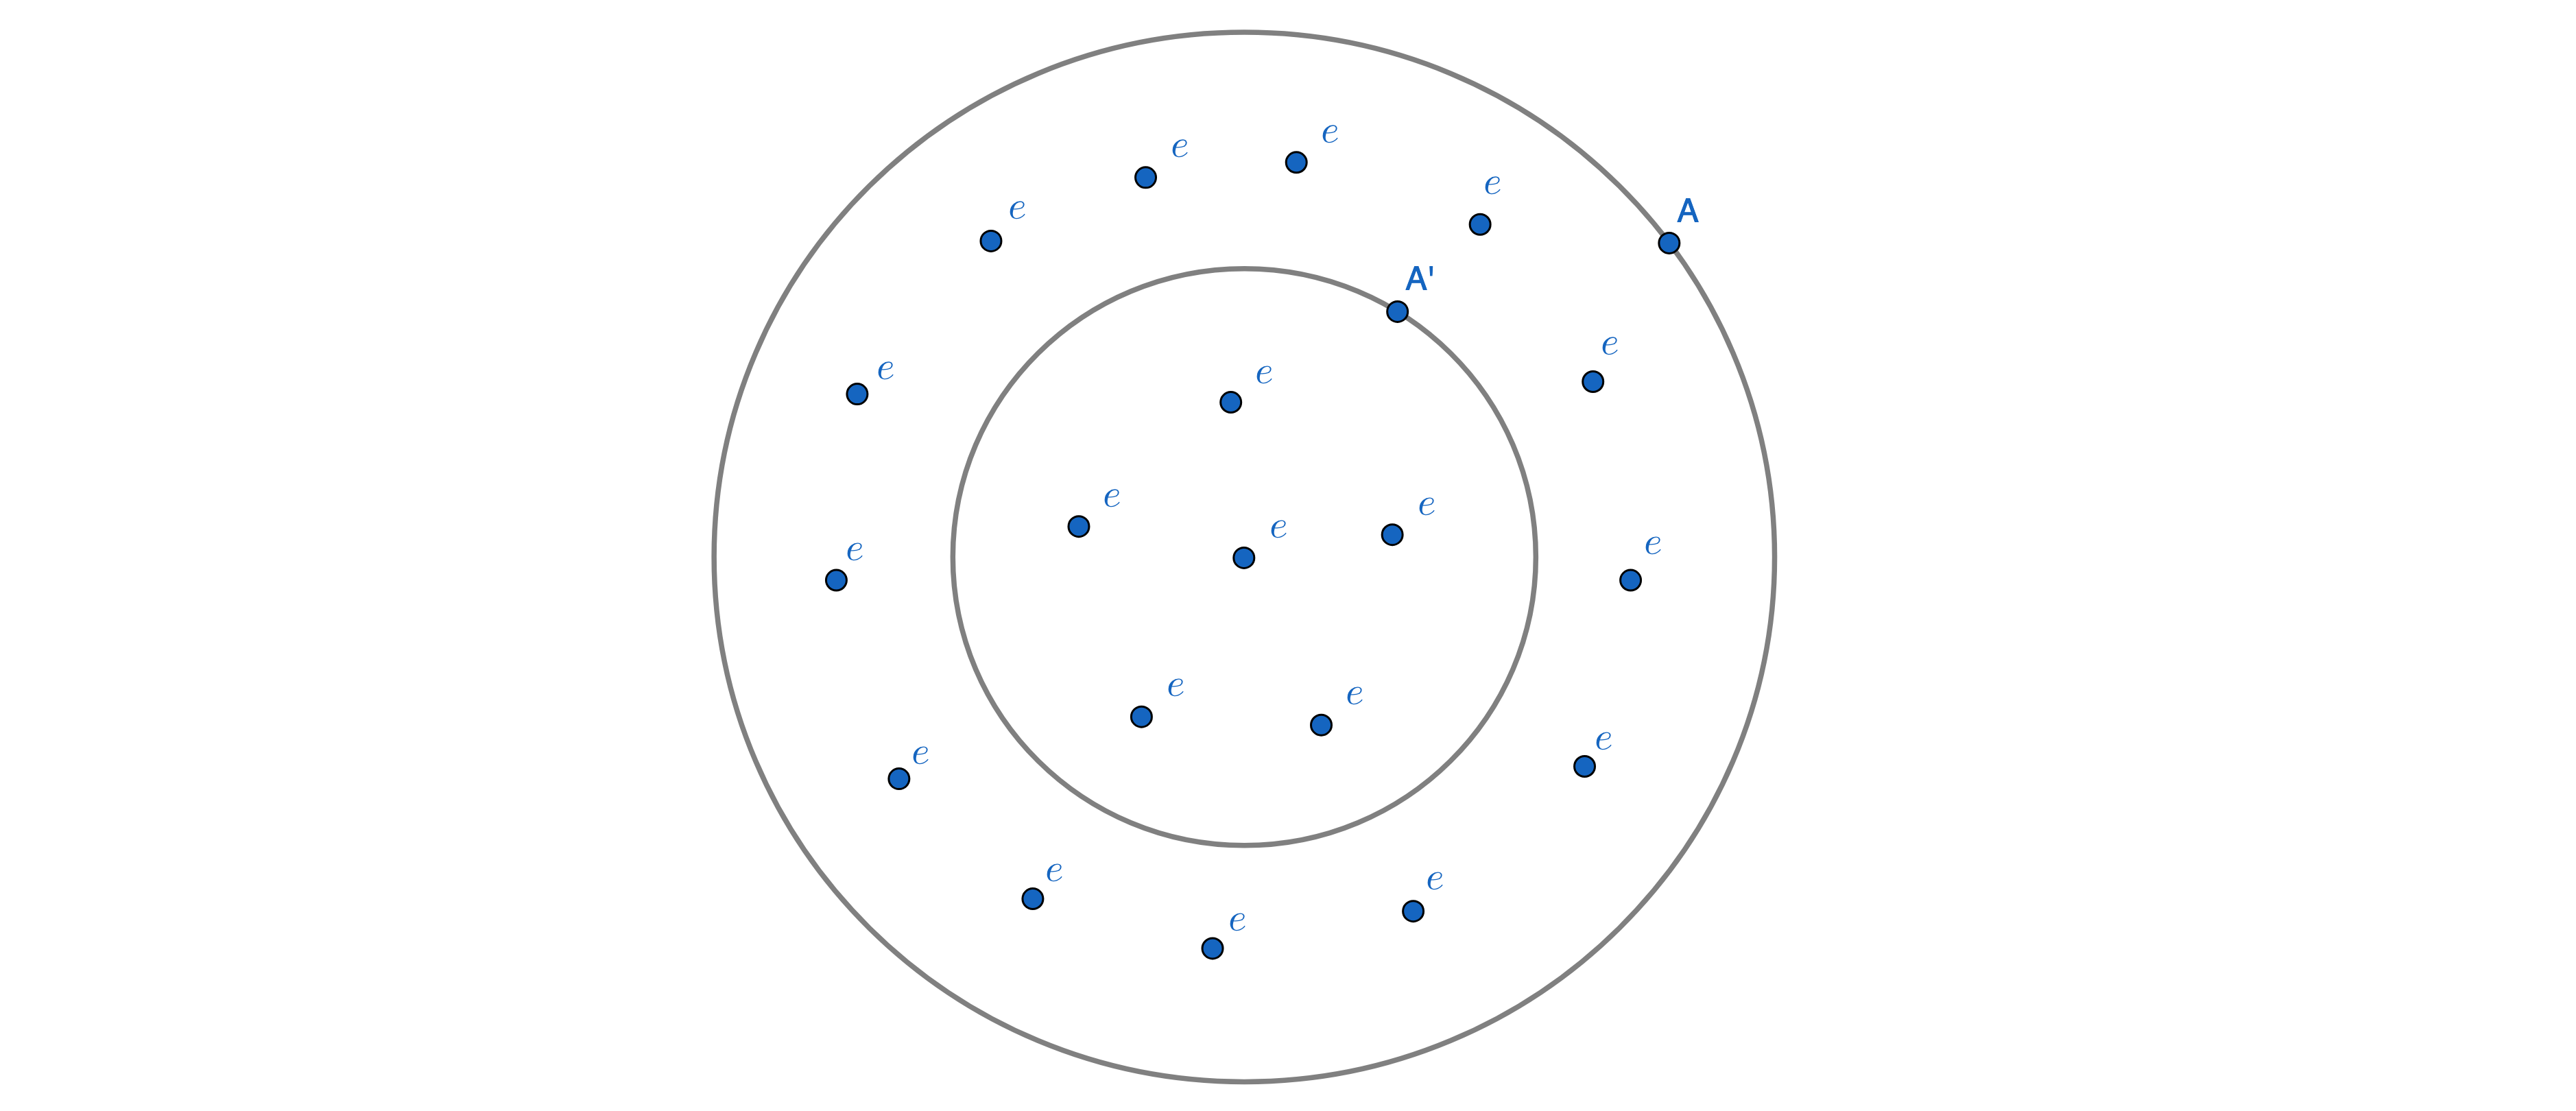

Somit gilt $\frac{Q_A}{A}=\frac{Q_A'}{A'}$ und der Quotient $\frac{Q}{A}$ bekommt einen neuen Namen:

$
\begin{align}
\sigma = \frac{Q}{A}
\end{align}
$

$\sigma$ beschreibt die **Flächenladungsdichte**.

## 2.B. Superpositionsprinzip

= Die resultierende Kraft $\vec{F}_{res}$ auf einen Körper kann über die vektorielle Addition von mehreren, auf diesen Körper wirkenden Kräften $\vec{F}_i$ berechnet werden:

$
\begin{align}
\vec{F}_{res}=\vec{F}_1+\vec{F}_2+...+\vec{F}_n
\end{align}
$

Die Einzelkräfte $\vec{F}_i$ sind hierbei **unabhängig** und beeinflussen sich gegenseitig nicht.

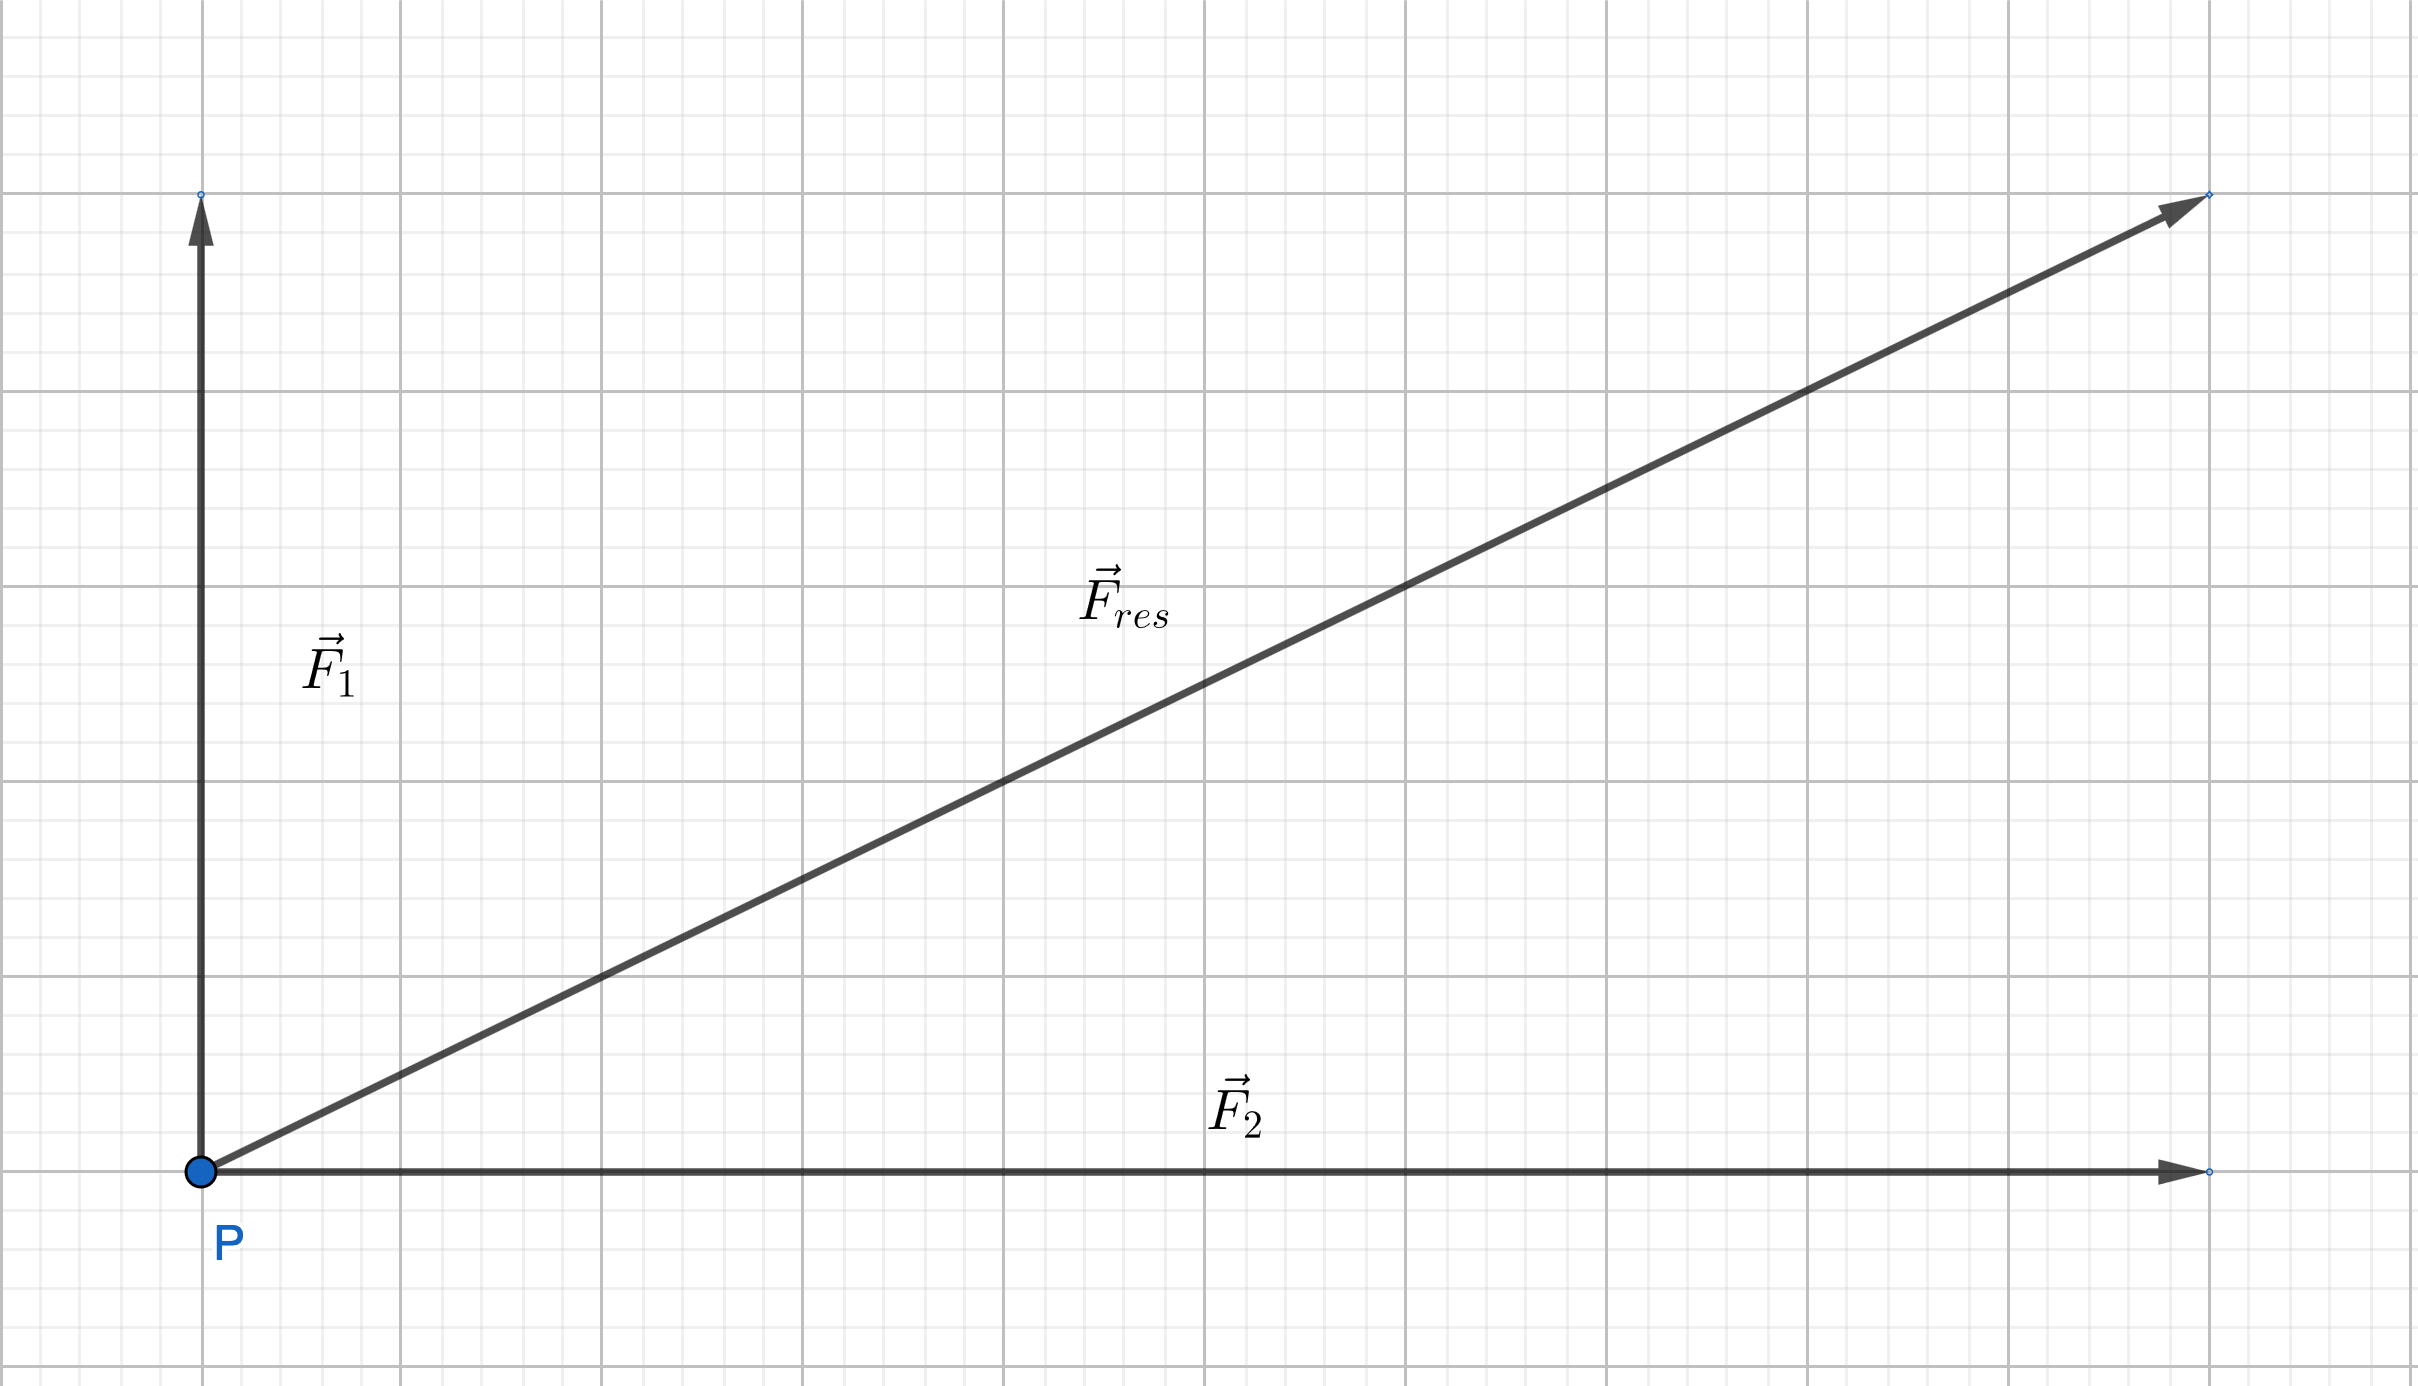

Dieses Prinzip lässt sich auf die elektrischen Feldstärken $\vec{E}_i$ von sich überlagernden Einzelfeldern ausweiten:

$
\begin{align}
\vec{F}_i&=\vec{E}_i\cdot q\\
\vec{F}_{res}&=\vec{E}_{res}\cdot q\\
&=\vec{F}_1+\vec{F}_2+...+\vec{F}_n\\
&=\vec{E}_1\cdot q+\vec{E}_2\cdot q+...+\vec{E}_n\cdot q\\
&=(\vec{E}_1+\vec{E}_2+...+\vec{E}_n)\cdot q\\
\vec{E}_{res}&=\vec{E}_1+\vec{E}_2+...+\vec{E}_n
\end{align}
$

Somit können komplexe Feldüberlagerungen in einfachere (vorzugsweise radiale) Einzelfelder aufgebrochen werden.

Auf elektrische Potenziale $\varphi_i$ von verschiedenen Einzelfeldern lässt sich das Prinzip auch anwenden:

$
\begin{align}
\vec{E}_{res}&=\frac{\Delta\varphi_{res}}{\Delta\vec{s}}\\
\Delta\varphi_{res}&=\vec{E}_{res}\cdot\Delta\vec{s}\\
&=(\vec{E}_1+\vec{E}_2+...+\vec{E}_n)\cdot\Delta\vec{s}\\
&=\vec{E}_1\cdot\Delta\vec{s}+\vec{E}_2\cdot\Delta\vec{s}+...+\vec{E}_n\cdot\Delta\vec{s}\\
&=\Delta\varphi_1+\Delta\varphi_2+...+\Delta\varphi_n\\
\end{align}
$

----

Es liegt deshalb nahe, dass:

$
\begin{align}
\varphi_{res}&=\varphi_1+\varphi_2+...+\varphi_n\\
\end{align}
$

Formaler Beweis:

$
\begin{align}
\varphi(\vec{r})&=\int_r^\infty \vec{E}_{res} \cdot d\vec{s} \\
&=\int_r^\infty (\vec{E}_1 + \vec{E}_2 + ... + \vec{E}_n) \cdot d\vec{s} \\
&=\int_r^\infty (\vec{E}_1 \cdot d\vec{s} + \vec{E}_2 \cdot d\vec{s} + ... + \vec{E}_n \cdot d\vec{s}) \\
&= \int_r^\infty \vec{E}_1 \cdot d\vec{s} + \int_r^\infty \vec{E}_2 \cdot d\vec{s} + ... + \int_r^\infty \vec{E}_n \cdot d\vec{s} \\
&= \varphi_1(\vec{r}) + \varphi_2(\vec{r}) + ... + \varphi_n(\vec{r})
\end{align}
$

## 2.C. Prinzip der Vektorisierung

TODO: Problemstellung

Eine vektorielle Kraft $\vec{F}$ kann durch eine Richtung und einen Betrag $F$ angegeben werden.

$
\begin{align}
\vec{F}&=\hat{v}\cdot F\\
&=\frac{\vec{v}}{|\vec{v}|}\cdot F
\end{align}
$

Der Vektor $\vec{v}$ gibt hierbei die Richtung des Kraftpfeils vor.

Das selbe gilt auch für andere Größen, wie die elektrische Feldstärke $\vec{E}$:

$
\begin{align}
\vec{E}&=\hat{v}\cdot E\\
&=\frac{\vec{v}}{|\vec{v}|}\cdot E
\end{align}
$

Hierbei gibt der Vektor $\vec{v}$ die Richtung der Feldstärke vor.

## 2.D. Berechnung der Größen

Benötigte Größen:
- Elektrische Feldstärke
- Elektrische Feldkraft
- Elektrisches Potenzial
- Potenzielle Energie
- Für Später:
    - Luftwiderstandskraft
    - Stokes'sche Reibungskraft
    - Gravitationskraft

### Elektrische Feldstärke

Der Betrag der elektrischen Feldstärke $E_i$ einer Punktladung $Q_i$ ist gegeben durch:

$
\begin{align}
E_i=\frac{1}{4\cdot\pi\cdot\varepsilon_0}\cdot\frac{Q_i}{r^2}
\end{align}
$

----

Hierbei beschreibt $r$ den Abstand zur Punktladung $Q_i$. Dieser kann berechnet werden durch:

$
\begin{align}
r=|\vec{s}-\vec{s}_{Q_i}|
\end{align}
$

$s$ beschreibt den Ort an dem die Feldstärke $E_i$ wirkt und $s_{Q_i}$ die Position der Punktladung.

Da der Betrag der Feldstärke $E_i$ für eine positive Punktladung $Q_i$ positiv ist und in diesem Fall ein positiv geladener Probekörper von $i$ abgestoßen werden würde zeigt auch der richtungsgebende Vektor $v$ von der Punktladung $i$ weg:

$
\begin{align}
\vec{v}=\vec{s}-\vec{s}_{Q_i}
\end{align}
$

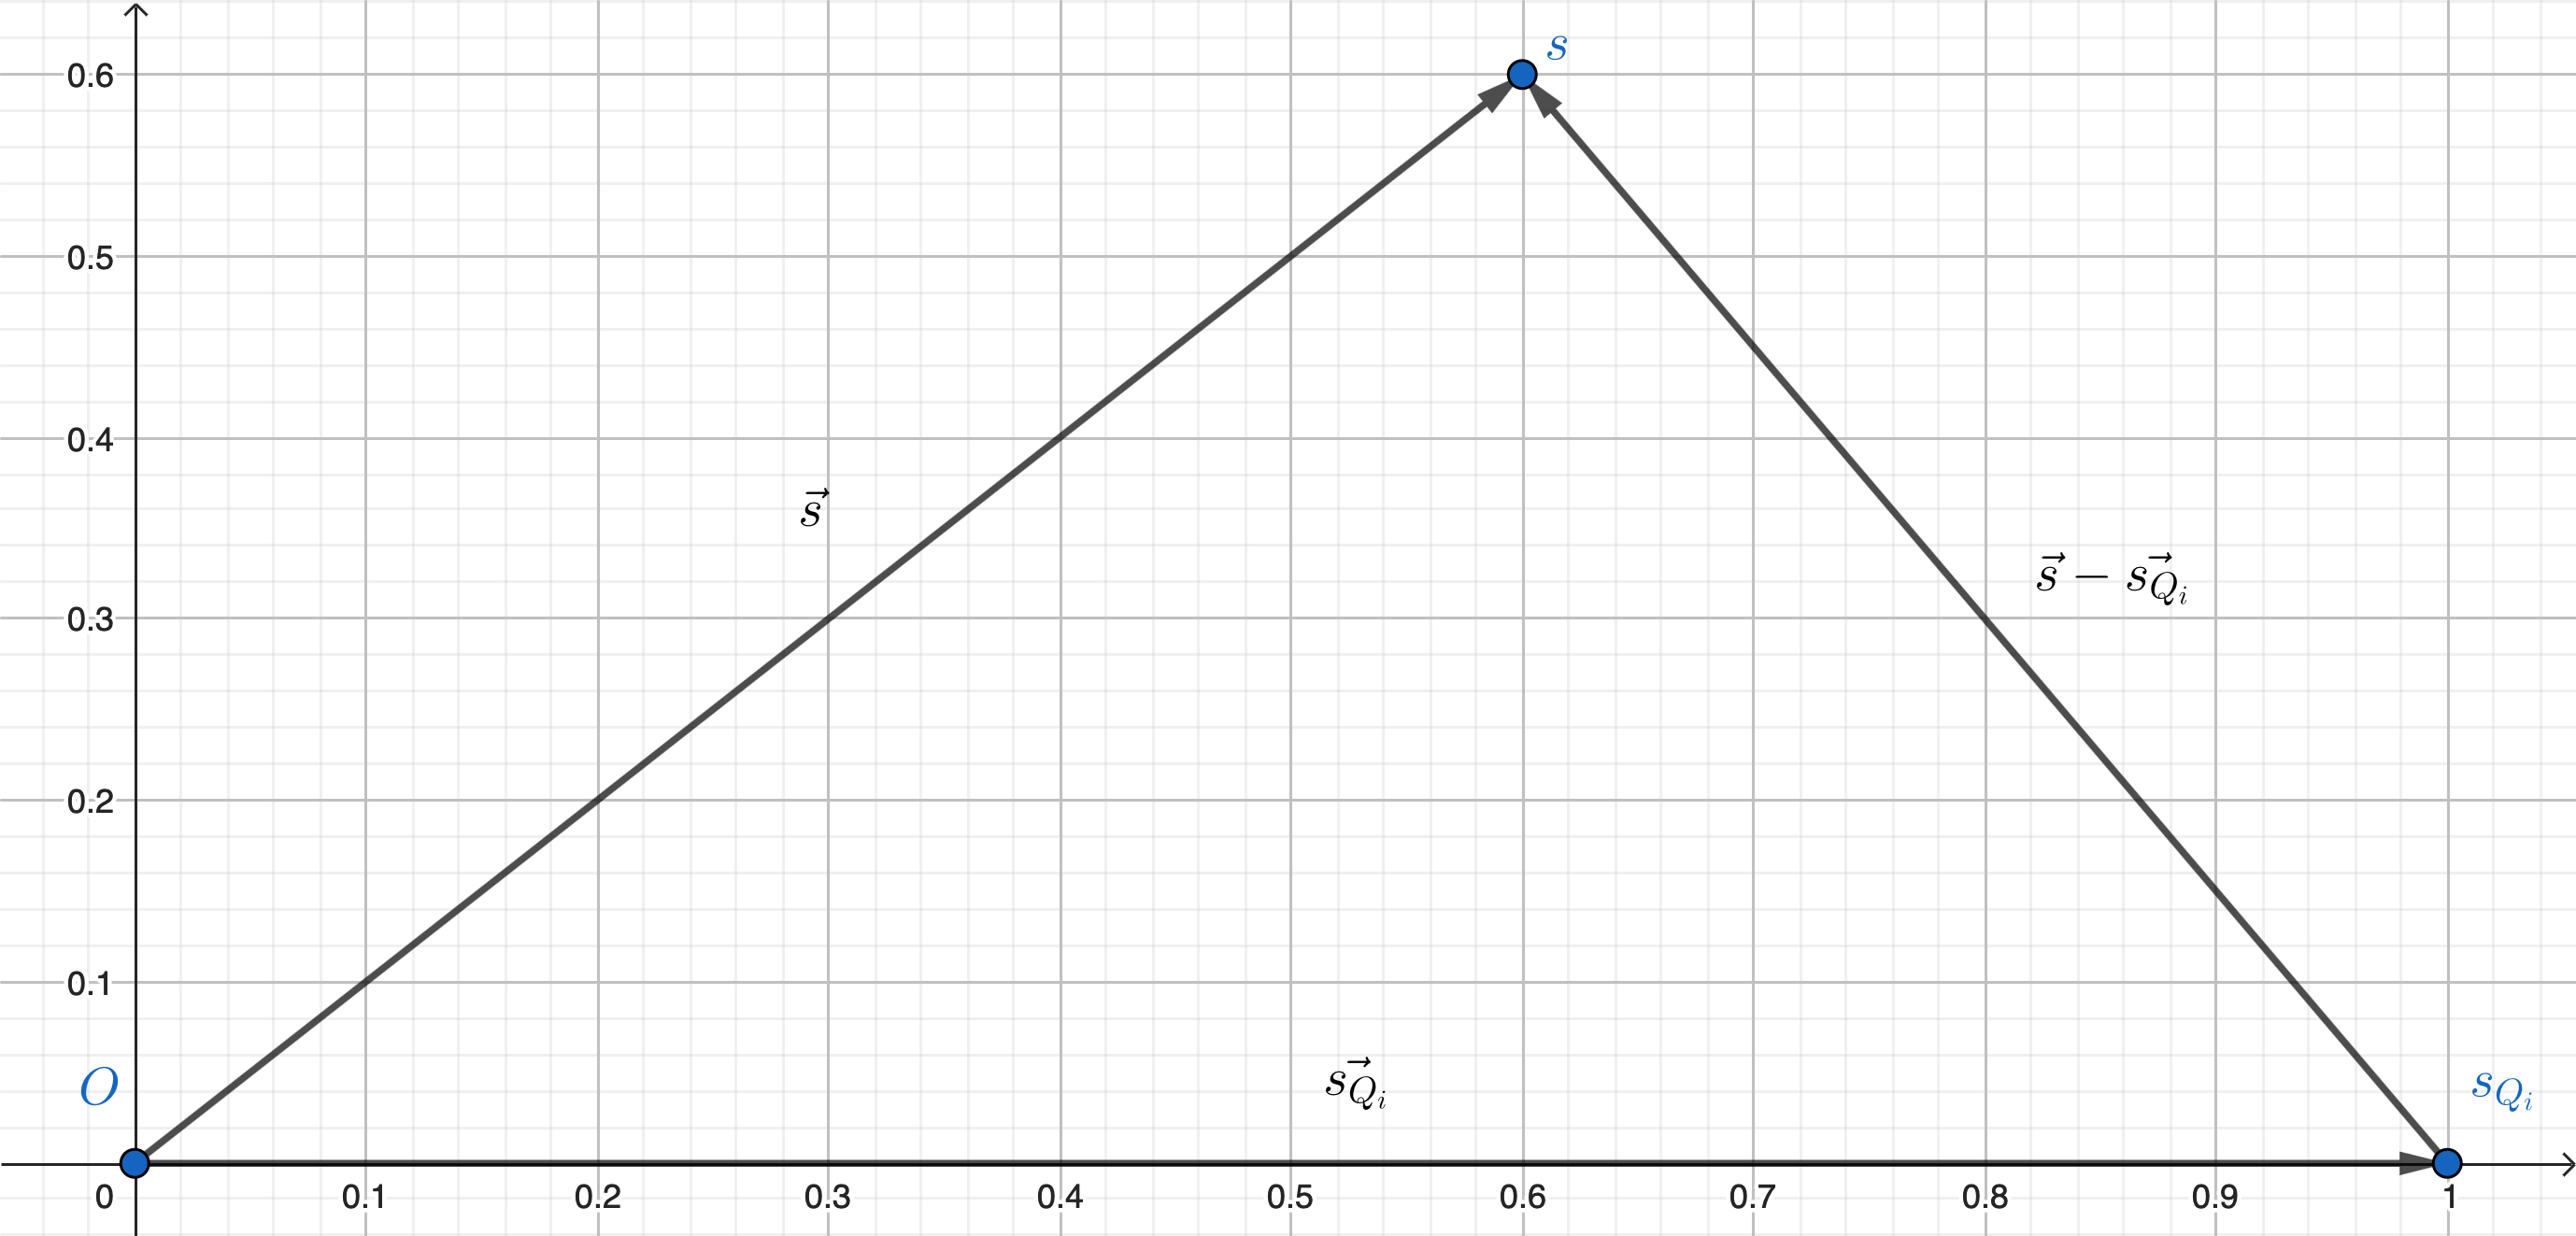

Mit dem Prinzip der Vektorisierung kann nun $\vec{E}_i$ berechnet werden:

$
\begin{align}
\vec{E}_i&=\frac{\vec{v}}{|\vec{v}|}\cdot E\\
&=\frac{\vec{s}-\vec{s}_{Q_i}}{|\vec{s}-\vec{s}_{Q_i}|}\cdot\frac{1}{4\cdot\pi\cdot\varepsilon_0}\cdot\frac{Q_i}{|\vec{s}-\vec{s}_{Q_i}|^2}\\
&=(\vec{s}-\vec{s}_{Q_i})\cdot\frac{1}{4\cdot\pi\cdot\varepsilon_0}\cdot\frac{Q_i}{|\vec{s}-\vec{s}_{Q_i}|^3}\\
\end{align}
$

----

Durch das Superpositionsprinzip lässt sich nun die resultierende elektrische Feldstärke $\vec{E}_{res}$ berechnen:

$
\begin{align}
\vec{E}_{res}&=\vec{E}_1+\vec{E}_2+...+\vec{E}_n
\end{align}
$

In [2]:
# Berechnet die elektrische Feldstärke an pos
def field_strength(pos):
    delta_Q1 = pos - pos_Q1
    delta_Q2 = pos - pos_Q2
    # Feldstärke vom Feld von Q1
    e_Q1 = delta_Q1 * (charge_Q1 /
           (4 * np.pi * epsilon_0 * (mag(delta_Q1) ** 3)))
    # Feldstärke vom Feld von Q2
    e_Q2 = delta_Q2 * (charge_Q2 /
           (4 * np.pi * epsilon_0 * (mag(delta_Q2) ** 3)))
    # Superpositionsprinzip
    return e_Q1 + e_Q2

### Elektrische Feldkraft

Die elektrische Feldkraft $\vec{F}_{el}$ auf eine weitere Punktladung mit der Ladung $q$ ist gegeben durch:

$
\begin{align}
\vec{F}_{el}&=\vec{E}_{res}\cdot q\\
\end{align}
$

Hierbei ist $\vec{s}$ die Position der zweiten Punktladung.

In [3]:
# Berechnet die elektrische Feldkraft die auf q wirkt
def force_q_electrical():
    return field_strength(pos_q) * charge_q

### Elektrisches Potenzial

Das elektrische Potenzial $\varphi_i$ des Feldes einer Punktladung $Q_i$ (=**Coulomb-Potenzial**) ist gegeben durch:

$
\begin{align}
\varphi_i&=\frac{1}{4\cdot\pi\varepsilon_0}\cdot\frac{Q_i}{r}
\end{align}
$

Das Null-Niveau liegt hier im unendlichen ($\varphi(\infty)=0J$).

----

Hierbei beschreibt $r$ den Abstand zur Punktladung $Q_i$. Dieser kann berechnet werden durch:

$
\begin{align}
r=|\vec{s}-\vec{s}_{Q_i}|
\end{align}
$

$s$ beschreibt den Ort an dem das Potenzial $\varphi$ herscht und $s_{Q_i}$ die Position der Punktladung.

Somit ergibt sich:

$
\begin{align}
\varphi_i&=\frac{1}{4\cdot\pi\varepsilon_0}\cdot\frac{Q_i}{|\vec{s}-\vec{s}_{Q_i}|}
\end{align}
$

----

Durch das Superpositionsprinzip lässt sich nun das resultierende elektrische Potenzial $\varphi_{res}$ berechnen:

$
\begin{align}
\varphi_{res}&=\varphi_1+\varphi_2+...+\varphi_n
\end{align}
$

In [20]:
# Berechnet das Potenzial an pos
def potential(pos):
    # Potenzial vom Feld von Q1
    phi_Q1 = charge_Q1 / (
             mag(pos - pos_Q1) * 4 * np.pi * epsilon_0)
    # Potenzial vom Feld von Q2
    phi_Q2 = charge_Q2 / (
             mag(pos - pos_Q2) * 4 *  np.pi * epsilon_0)
    # Superpositionsprinzip
    return phi_Q1 + phi_Q2

# Potenzielle Energie

Die potenzielle Energie $E$ ist definiert durch:

$
\begin{align}
\Delta E&=\vec{F}\cdot\Delta\vec{s}\\
&=q\cdot\vec{E}\cdot\Delta\vec{s}\\
\\
\Delta\varphi&=\vec{E}\cdot\Delta\vec{s}\\
\end{align}
$

----

Dadurch, dass $\Delta E=\Delta\varphi\cdot q$ liegt nahe, dass:

$
\begin{align}
E&=q \cdot \varphi \\
\end{align}
$

Formaler Beweis:

$
\begin{align}
E(\vec{r})&=\int_r^\infty \vec{F}_{res} \cdot d\vec{s} \\
&=\int_r^\infty \vec{E}_{res} \cdot q \cdot d\vec{s} \\
&=q \cdot \int_r^\infty \vec{E}_{res} \cdot d\vec{s} \\
&=q \cdot \varphi(\vec{r})
\end{align}
$

In [21]:
# Berechnet die potenzielle Energie an pos
def potential_energy(pos):
    return potential(pos) * charge_q

### Luftwiderstandskraft

$|\vec{F}_{luft}|=\frac{1}{2}\cdot c_w\cdot A \cdot\rho\cdot |\vec{v}|^2$

$\vec{F}_{luft}=\frac{\vec{v}}{|\vec{v}|}\cdot\frac{1}{2}\cdot c_w\cdot A \cdot\rho\cdot |\vec{v}|^2=\vec{v}\cdot\frac{1}{2}\cdot c_w\cdot A \cdot\rho\cdot |\vec{v}|$

In [22]:
def force_q_airfr():
    return vel_q * 0.5 * airfr_cw * airfr_area * airfr_density * mag(vel_q)

### Gesetz von Stokes

$|\vec{F}_{res}|=6\cdot\pi\cdot r\cdot\eta\cdot|\vec{v}|$

$\vec{F}_{res}=\frac{\vec{v}}{|\vec{v}|}\cdot6\cdot\pi\cdot r\cdot\eta\cdot|\vec{v}|=\vec{v}\cdot6\cdot\pi\cdot r\cdot\eta$

In [23]:
def force_q_stokes():
    return vel_q * 6 * np.pi * stokes_radius * stokes_viscosity

### Schwerkraft

$F_G=m\cdot g$

$|\vec{F}_G|=m\cdot |\vec{g}|$

$\vec{F}_G=\left(\begin{array}{c} 0 \\ -1 \end{array}\right)\cdot m\cdot |\vec{g}|$

In [24]:
def force_q_gravity():
    return np.array([0, -1]) * gravity_accel * mass_q

## 2.E. Iterationsverfahren

# 3. Vorstellung der Simulation

> endlich

# 4. Ausblick

# 5. Fazit- und Quellen

- https://de.wikipedia.org/wiki/Elektrisches_Potential
- https://de.wikipedia.org/wiki/Str%C3%B6mungswiderstand
- https://de.wikipedia.org/wiki/Gesetz_von_Stokes
- Physik Buch (S. 24, S. 54, S. 58-60)

In [25]:
def force_q():
    res = force_q_electrical()
    if stokes_enable:
        res += force_q_stokes()
    if airfr_enable:
        res += force_q_airfr()
    if gravity_enable:
        res += force_q_gravity()

def accel_q():
    return force_q() / mass_q

def kinetic_energy():
    return 0.5 * mass_q * vel_q.dot(vel_q)

stokes_enable = False
stokes_radius = 0.5
stokes_viscosity = 1

airfr_enable = False
airfr_area = 0.5
airfr_cw = 0.45
airfr_density = 1.2041

gravity_enable = False
gravity_accel = 9.81

charge_q = 5e-8
charge_Q1 = 5e-6
charge_Q2 = -14e-6

enable_gravity = False

pos_q = np.array([0, 0.2], dtype='d')
pos_Q1 = np.array([-0.3, 0], dtype='d')
pos_Q2 = np.array([0.3, 0], dtype='d')

vel_q = np.array([0, 0], dtype='d')
mass_q = 1e-3

delta_t = 1e-3

epsilon_0 = 8.8541878188e-12

current_t = 0

def reset():
    global pos_q, vel_q, current_t
    pos_q = np.array([0, 0.2], dtype='d')
    vel_q = np.array([0, 0], dtype='d')
    current_t = 0

def step():
    global vel_q, pos_q, current_t
    vel_q += accel_q() * delta_t
    pos_q += vel_q * delta_t
    current_t += delta_t
    return pos_q

In [33]:
# (c) 2024 Lucas Birkert
#
# Licensed under GPLv3

def potential_data():
    """Returns the data for a potential surface/contour"""
    z = np.empty((80,80))
    ysteps, xsteps = z.shape
    x, y = np.linspace(-0.2, 0.2, xsteps), np.linspace(-0.2, 0.2, ysteps)
    for xi in range(x.shape[0]):
        for yi in range(y.shape[0]):
            z[yi][xi] = potential(np.array([x[xi], y[yi]]))

    return x, y, z

def field_strength_data():
    """Returns the data for a field strength quiver"""
    x_range = np.linspace(-0.2, 0.2, 32)
    y_range = np.linspace(-0.2, 0.2, 32)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    u = np.zeros_like(x_grid)
    v = np.zeros_like(y_grid)
    
    for i in range(x_grid.shape[0]):
        for j in range(x_grid.shape[1]):
            vec = field_strength(np.array([x_grid[i, j], y_grid[i, j]]))
            vec_mag = np.sqrt(vec.dot(vec))
            u[i, j], v[i, j] = (vec / vec_mag) * min(0.5, vec_mag / 1e5)
    
    return x_grid.flatten(), y_grid.flatten(), u.flatten(), v.flatten()

def field_lines_data():
    """Returns the data for a field lines streamline"""
    x_range = np.linspace(-0.2, 0.2, 64)
    y_range = np.linspace(-0.2, 0.2, 64)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    u = np.zeros_like(x_grid)
    v = np.zeros_like(y_grid)
    
    for i in range(x_grid.shape[0]):
        for j in range(x_grid.shape[1]):
            vec = field_strength(np.array([x_grid[i, j], y_grid[i, j]]))
            vec_mag = np.sqrt(vec.dot(vec))
            u[i, j], v[i, j] = (vec / vec_mag) * min(0.5, vec_mag / 1e5)
    
    return x_range, y_range, u, v

In [35]:
# (c) 2024 Lucas Birkert
#
# Licensed under GPLv3

from IPython.display import display, clear_output
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import ipywidgets as widgets
import time
import random

reset()

fig1 = go.FigureWidget(go.Figure())

# Koordinatensystem
axis_range = [-0.2, 0.2]
fig1.update_xaxes(range=axis_range, title = 'y', tickmode = 'linear',
                 showticklabels = True, side='top',gridcolor='rgb(224,224,224)')
fig1.update_yaxes(range=axis_range, title = 'x', tickmode = 'linear',
                 showticklabels = True, side='right', gridcolor='rgb(224,224,224)')

fig1.add_vline(x=0, line_width=1)
fig1.add_hline(y=0, line_width=1)

fig1.update_layout(
    plot_bgcolor='rgb(255,255,255)', height=800, width=800,
    margin=dict(b=10, t=50, l=30, r=10),
    xaxis=dict(dtick = 0.02),
    yaxis=dict(dtick = 0.02),
    xaxis_ticksuffix='m',
    yaxis_ticksuffix='m',
)

# Probeladungsspur
fig1.add_scatter(y=[], name='trace', mode='lines', marker=dict(color='black'));

# Punktladungen
fig1.add_scatter(x=[pos_q[0]], y=[pos_q[1]], marker=dict(color='red', size=10), name='q');

fig1.add_scatter(x=[pos_Q1[0]], y=[pos_Q1[1]], marker=dict(color='red', size=20), name='Q1');
fig1.add_scatter(x=[pos_Q2[0]], y=[pos_Q2[1]], marker=dict(color='red', size=20), name='Q2');

# Äquipotenziallinien
fig1.add_trace(go.Contour(
    x=[], y=[], z=[],
    line_width=2,
    showscale=False,
    colorscale=[[0, 'darkgreen'], [1, 'darkgreen']],
    contours=dict(
        coloring='lines',
        showlabels = True, # show labels on contours
        labelfont = dict( # label font properties
            size = 12,
            color = 'black',
        ),
    ),
    line_smoothing=0.85,
    fillcolor='darkgreen',
    zorder=-10,
    name='pot',
    visible=False,
));

# Feldstärke Vektorfeld
quiver = ff.create_quiver([0], [0], [0], [0], marker_color='purple')
fig1.add_traces(data = quiver.data)
fig1.data[5].visible = False
fig1.data[5].showlegend = False

# Feldstärke Feldlinien
streamline = ff.create_streamline([0, 0], [0, 0], [0, 0], [0, 0], marker_color='darkred')
fig1.add_traces(data=streamline.data)
fig1.data[6].visible = False
fig1.data[6].showlegend = False

# Vektorpfeile
def add_vector(fig, x, y, u, v, color):
    fig.add_trace(go.Scatter(
        x=[x, x + u],
        y=[y, y + v],
        mode='lines',
        line=dict(color=color, width=2),
        showlegend=False
    ))

    fig.add_annotation(
        x=x+u, y=y+v,
        ax=x, ay=y,
        xref="x", yref="y",
        axref="x", ayref="y",
        showarrow=True,
        arrowhead=3,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor=color
    )

def update_vector(fig, trace_index, arrow_index, x, y, u, v):
    fig.data[trace_index].update(
        x=[x, x+u],
        y=[y, y+v]
    )

    fig.layout.annotations[arrow_index].update(
        x=x+u, y=y+v,
        ax=x, ay=y
    )

add_vector(fig1, 0, 0, 0, 0, 'red')
fig1.data[7].visible = False
fig1.layout.annotations[0].visible = False
add_vector(fig1, 0, 0, 0, 0, 'blue')
fig1.data[8].visible = False
fig1.layout.annotations[1].visible = False

# Potenzial 3D-Plot
fig2 = go.FigureWidget(make_subplots(
    rows=1, cols=2,
    subplot_titles=('Potenzial',  'Potenzielle Energie'),
    specs=[[{'type': 'surface'}, {'type': 'surface'}]],
    horizontal_spacing=0,
))
fig2.update_layout(
    plot_bgcolor='rgb(255,255,255)', height=400, width=800,
    margin=dict(b=10, t=30, l=10, r=10),
    scene=dict(
        zaxis_ticksuffix='V',
        xaxis_ticksuffix='m',
        yaxis_ticksuffix='m',
    ),
    scene2=dict(
        zaxis_ticksuffix='J',
        xaxis_ticksuffix='m',
        yaxis_ticksuffix='m',
    ),
)
fig2.add_trace(go.Surface(
    z=[], x=[], y=[],
    contours = dict(
        z=dict(
            show=True, start=-2, end=2, size=8000000,
            color="darkgreen", width=16,
        ),
        x=dict(show=True, color="rgb(160, 160, 160)"),
        y=dict(show=True, color="rgb(160, 160, 160)"),
    ),
    showscale=False,
    colorscale="temps",
), row=1, col=1)
#fig2.axi
fig2.add_trace(go.Surface(
    z=[], x=[], y=[],
    contours = dict(
        x=dict(show=True, color="rgb(160, 160, 160)"),
        y=dict(show=True, color="rgb(160, 160, 160)"),
    ),
    showscale=False,
    colorscale="rdbu",
), row=1, col=2)

# Geschwindigkeit- und Energie-Zeit-Diagramm
fig3 = go.FigureWidget(make_subplots(
    rows=2, cols=1,
    subplot_titles=('Geschwindigkeit',  'Energie-Zeit-Diagramm'),
    vertical_spacing=0.1,
))
fig3.update_layout(
    height=600, width=800,
    margin=dict(t=30, b=30, l=70, r=50),
    yaxis_ticksuffix='m/s',
    xaxis_ticksuffix='s',
    yaxis2_ticksuffix='J',
    xaxis2_ticksuffix='s',
)

fig3.add_scatter(y=[], marker_color='blue', name='velocity', mode='lines', row=1, col=1) # velocity

fig3.add_scatter(y=[], marker_color='blue', name='kinetic', mode='lines', row=2, col=1) # kinetic energy
fig3.add_scatter(y=[], marker_color='green', name='potential', mode='lines', row=2, col=1) # potential energy
fig3.add_scatter(y=[], marker_color='black', name='total', mode='lines', row=2, col=1) # total energy

# Copyright
# DO NOT DELETE, DELETING IS CONSIDERED A LICENSE BREACH
template = go.layout.Template()
template.layout.annotations = [
    dict(
        name='watermark',
        text='(c) 2024 - Lucas Birkert - All Rights Reserved',
        textangle=-0,
        opacity=0.1,
        font=dict(color='black', size=10),
        xref='paper',
        yref='paper',
        x=0,
        y=0,
        showarrow=False,
    )
]
fig1.update_layout(template=template)
fig2.update_layout(template=template)
fig3.update_layout(template=template)
# DO NOT DELETE, DELETING IS CONSIDERED A LICENSE BREACH

pos_x = []
pos_y = []

def simulation(speed=1.0):
    """Run the simulation with the given speed (1 = real time, 2 = double as fast)"""

    global pos_x, pos_y
    pos_x = [pos_q[0]]
    pos_y = [pos_q[1]]

    energy_kin = []
    energy_pot = []
    energy_tot = []
    itertimes = []
    velocities = []

    current_iteration = 0
    
    while True:
        iterations = (speed * 0.2) / delta_t
        for i in range(int(iterations)):
            step()
            current_iteration += 1
            if current_iteration % 50 == 0:
                pos_x.append(pos_q[0])
                pos_y.append(pos_q[1])
                energy_kin.append(kinetic_energy())
                energy_pot.append(potential_energy(pos_q[0], pos_q[1]))
                energy_tot.append(energy_kin[-1] + energy_pot[-1])
                itertimes.append(current_iteration * delta_t)
                velocities.append(np.sqrt(vel_q.dot(vel_q)))

        # velocity chart
        fig3.data[0].y = velocities
        fig3.data[0].x = itertimes

        # energy charts
        fig3.data[1].y = energy_kin
        fig3.data[1].x = itertimes
        fig3.data[2].y = energy_pot
        fig3.data[2].x = itertimes
        fig3.data[3].y = energy_tot
        fig3.data[3].x = itertimes
        
        scatter = fig1.data[0]
        scatter.x = pos_x
        scatter.y = pos_y
    
        point = fig1.data[1]
        point.x = [pos_x[-1]]
        point.y = [pos_y[-1]]
        
        # Update force and velocity vectors
        force_q_x, force_q_y = force_q() * 100
        update_vector(fig1, 7, 0, pos_q[0], pos_q[1], force_q_x, force_q_y)
        update_vector(fig1, 8, 1, pos_q[0], pos_q[1], vel_q[0], vel_q[1])

        time.sleep(0.1)

def settings(_distance_Q1_Q2,
             _charge_q,
             _charge_q_neg,
             _charge_Q1,
             _charge_Q1_neg,
             _charge_Q2,
             _charge_Q2_neg,
             _mass_q,
             _pos_q_x,
             _pos_q_y,
             _vel_q_x,
             _vel_q_x_neg,
             _vel_q_y,
             _vel_q_y_neg,
             _show_potential_contour,
             _show_field_lines,
             _show_field_strength,
             _show_force_q,
             _show_vel_q):
    """Apply the settings"""
    global charge_q, charge_Q1, charge_Q2, mass_q, pos_Q1, pos_Q2, pos_q, vel_q
    charge_q = _charge_q * (-1 if _charge_q_neg else 1) * 1e-9
    charge_Q1 = _charge_Q1 * (-1 if _charge_Q1_neg else 1) * 1e-9
    charge_Q2 = _charge_Q2 * (-1 if _charge_Q2_neg else 1) * 1e-9
    mass_q = _mass_q * 1e-6

    _vel_q_x *= 1e-6 * (-1 if _vel_q_x_neg else 1)
    _vel_q_y *= 1e-6 * (-1 if _vel_q_y_neg else 1)
    vel_q = np.array([_vel_q_x, _vel_q_y])

    # convert to SI
    _distance_Q1_Q2 /= 100
    _pos_q_x /= 100
    _pos_q_y /= 100
    # update coords
    pos_q = np.array([_pos_q_x, _pos_q_y])
    point_q = fig1.data[1]
    point_q.x = [pos_q[0]]
    point_q.y = [pos_q[1]]
    pos_Q1 = np.array([-_distance_Q1_Q2/2.0, 0], dtype='d')
    pos_Q2 = np.array([_distance_Q1_Q2/2.0, 0], dtype='d')
    point_Q1 = fig1.data[2]
    point_Q1.x = [pos_Q1[0]]
    point_Q2 = fig1.data[3]
    point_Q2.x = [pos_Q2[0]]
    
    
    potential_surf = fig2.data[0]
    potential_surf.x, potential_surf.y, z_surf = potential_data()
    potential_energy_surf = fig2.data[1]
    potential_energy_surf.x, potential_energy_surf.y = potential_surf.x, potential_surf.y,
    
    axis_scale = 2e11 * abs(charge_Q1) + abs(charge_Q2)
    potential_surf.z = np.clip(z_surf, -axis_scale * 1.1, axis_scale * 1.1)
    potential_energy_surf.z = potential_surf.z * charge_q

    potential_contour = fig1.data[4]
    if _show_potential_contour:
        potential_contour.x = potential_surf.x
        potential_contour.y = potential_surf.y
        potential_contour.z = potential_surf.z
        potential_contour.contours['start'] = -axis_scale
        potential_contour.contours['end'] = axis_scale
        potential_contour.contours['size'] = axis_scale / 5
    potential_contour.visible = _show_potential_contour;
    
    potential_surf.contours['z']['start'] = -axis_scale
    potential_surf.contours['z']['end'] = axis_scale
    potential_surf.contours['z']['size'] = axis_scale / 10
    fig2.update_layout(
        scene = dict(
            zaxis = dict(range=[-axis_scale, axis_scale]),
        ),
        scene2 = dict(
            zaxis = dict(range=[-axis_scale * abs(charge_q), axis_scale * abs(charge_q)]),
        ),   
    )

    if _show_field_strength:
        x, y, u, v = field_strength_data()
        quiver = ff.create_quiver(x, y, u, v, arrow_scale=.2)
        fig1.data[5].update(quiver.data[0])
    fig1.data[5].visible = _show_field_strength

    if _show_field_lines:
        x, y, u, v = field_lines_data()
        streamline = ff.create_streamline(x, y, u, v, arrow_scale=.01, line_smoothing=0.85)
        fig1.data[6].update(streamline.data[0])
    fig1.data[6].visible = _show_field_lines

    fig1.data[7].visible = _show_force_q
    fig1.layout.annotations[0].visible = _show_force_q
    
    if _show_vel_q:
        update_vector(fig1, 8, 1, pos_q[0], pos_q[1], vel_q[0], vel_q[1])
    fig1.data[8].visible = _show_vel_q
    fig1.layout.annotations[1].visible = _show_vel_q

# Display both plots
display(fig1, fig3, fig2)
interact_manual(
    simulation,
    speed=(0, 10, 0.1),
)
interact(
    settings,
    _distance_Q1_Q2=widgets.FloatSlider(description='$d$ in cm', min=1, max=30, step=0.01, value=20),
    _charge_q=widgets.FloatLogSlider(description='$q$ in nC', min=0, step=0.01, base=10, max=3, value=50),
    _charge_q_neg=widgets.Checkbox(False, description='$q$ negativ'),
    _charge_Q1=widgets.FloatLogSlider(description='$Q_1$ in nC', min=0, step=0.01, base=10, max=3, value=60),
    _charge_Q1_neg=widgets.Checkbox(False, description='$Q_1$ negativ'),
    _charge_Q2=widgets.FloatLogSlider(description='$Q_2$ in nC', min=0, step=0.01, base=10, max=3, value=180),
    _charge_Q2_neg=widgets.Checkbox(True, description='$Q_2$ negativ'),
    _mass_q=widgets.FloatLogSlider(description='$m_q$ in mg', min=0, base=10, max=5, step=0.01, value=5000),
    _pos_q_x=widgets.FloatSlider(description='$s_x$ in cm', min=-15, max=15, step=0.01, value = -5),
    _pos_q_y=widgets.FloatSlider(description='$s_y$ in cm', min=-15, max=15, step=0.01, value = 7.5),
    _vel_q_x=widgets.FloatLogSlider(description='$v_x$ in μm/s', min=0, max=5, base=10, step=0.01, value = 0),
    _vel_q_x_neg=widgets.Checkbox(False, description='$v_x$ negativ'),
    _vel_q_y=widgets.FloatLogSlider(description='$v_y$ in μm/s', min=0, max=5, base=10, step=0.01, value = 0),
    _vel_q_y_neg=widgets.Checkbox(False, description='$v_y$ negativ'),
    _show_potential_contour=widgets.Checkbox(False, description='Äquipotenziallinien anzeigen'),
    _show_field_lines=widgets.Checkbox(False, description='Feldlinien anzeigen'),
    _show_field_strength=widgets.Checkbox(False, description='Feldstärke (Vektorfeld) anzeigen'),
    _show_force_q=widgets.Checkbox(False, description='$\\vec{F}_{res}$ anzeigen'),
    _show_vel_q=widgets.Checkbox(False, description='$\\vec{v}$ anzeigen'),
);

FigureWidget({
    'data': [{'marker': {'color': 'black'},
              'mode': 'lines',
              'name': 'trace',
              'type': 'scatter',
              'uid': '98bbfdde-1d30-499b-b59c-ce9dcb7b9cc8',
              'y': []},
             {'marker': {'color': 'red', 'size': 10},
              'name': 'q',
              'type': 'scatter',
              'uid': '336e5283-7e55-4fff-b5dd-d4e28243a49c',
              'x': [0.0],
              'y': [0.2]},
             {'marker': {'color': 'red', 'size': 20},
              'name': 'Q1',
              'type': 'scatter',
              'uid': 'fbc3184d-6187-4b81-abd0-3094106ccb58',
              'x': [-0.1],
              'y': [0.0]},
             {'marker': {'color': 'red', 'size': 20},
              'name': 'Q2',
              'type': 'scatter',
              'uid': 'bdca7721-c39c-4309-8625-fbfbdd974a41',
              'x': [0.1],
              'y': [0.0]},
             {'colorscale': [[0, 'darkgreen'], [1, 'darkgreen']],
        

FigureWidget({
    'data': [{'marker': {'color': 'blue'},
              'mode': 'lines',
              'name': 'velocity',
              'type': 'scatter',
              'uid': 'c105f2fa-7d9c-44c1-b393-1cdc36454487',
              'xaxis': 'x',
              'y': [],
              'yaxis': 'y'},
             {'marker': {'color': 'blue'},
              'mode': 'lines',
              'name': 'kinetic',
              'type': 'scatter',
              'uid': '272b4f68-1de2-419f-a003-193bedb6eee8',
              'xaxis': 'x2',
              'y': [],
              'yaxis': 'y2'},
             {'marker': {'color': 'green'},
              'mode': 'lines',
              'name': 'potential',
              'type': 'scatter',
              'uid': '8d71fd41-9211-4717-a191-9ec5e8e22cde',
              'xaxis': 'x2',
              'y': [],
              'yaxis': 'y2'},
             {'marker': {'color': 'black'},
              'mode': 'lines',
              'name': 'total',
              'type': 'scatt

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                             'rgb(57, 177, 133)'], [0.3333333333333333, 'rgb(156,
                             203, 134)'], [0.5, 'rgb(233, 226, 156)'],
                             [0.6666666666666666, 'rgb(238, 180, 121)'],
                             [0.8333333333333334, 'rgb(232, 132, 113)'], [1.0,
                             'rgb(207, 89, 126)']],
              'contours': {'x': {'color': 'rgb(160, 160, 160)', 'show': True},
                           'y': {'color': 'rgb(160, 160, 160)', 'show': True},
                           'z': {'color': 'darkgreen', 'end': 2, 'show': True, 'size': 8000000, 'start': -2, 'width': 16}},
              'scene': 'scene',
              'showscale': False,
              'type': 'surface',
              'uid': 'a4fcfb6a-893a-4db3-8cf2-1e5860920883',
              'x': [],
              'y': [],
              'z': []},
             {'colorscale': [[0.0, 'rg

interactive(children=(FloatSlider(value=1.0, description='speed', max=10.0), Button(description='Run Interact'…

interactive(children=(FloatSlider(value=20.0, description='$d$ in cm', max=30.0, min=1.0, step=0.01), FloatLog…